# Loan Data from Prosper

## Table of Contents

- [Introduction](#intro)
- [Part I - Wrangling Data](#wrangle)
- [Part II - Exploratory Data Analysis](#exploratoryda)
- [Part III - Explanatory Data Analysis](#explanatoryda)
- [Part IV - Summary](#summary)

<a id='intro'></a>

## Introduction

Prosper Marketplace is a  company in California dedicated to the peer-to-peer lending industry. Prosper Funding LLC, operates Prosper.com, a website where individuals can either invest in personal loans or request to borrow money. It is America's first peer-to-peer lending marketplace, with over $7 billion in funded loans.

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

<a id='wrangle'></a>

## Wrangling Data

In this section we are going to gather, assess and cleaning our data. The data is stored in a csv file that we are going to read into a Pandas Data Frame.

In [1]:
## importing all the libraries that we are going to need for our study
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
## reading the csv file
loan_data=pd.read_csv('prosperLoanData.csv')

In [3]:
## visualizing the first lines of the data
loan_data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
## obtaining number of columns and rows
loan_data.shape

(113937, 81)

In [5]:
## finding duplicates in the data
loan_data[loan_data.duplicated()==True]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors


In [6]:
## looking for na values
df=loan_data.isnull().sum().sort_values(ascending=False)
df[df.values>(loan_data.shape[0])/3.3].index

Index(['GroupKey', 'LoanFirstDefaultedCycleNumber',
       'ScorexChangeAtTimeOfListing', 'ProsperPaymentsLessThanOneMonthLate',
       'ProsperPaymentsOneMonthPlusLate', 'OnTimeProsperPayments',
       'TotalProsperPaymentsBilled', 'TotalProsperLoans',
       'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding',
       'CreditGrade', 'ClosedDate'],
      dtype='object')

As we can see our data frame has not duplicated values but seems to have a huge quantity of missing values. In fact the variables 'GroupKey', 'LoanFirstDefaultedCycleNumber','ScorexChangeAtTimeOfListing', 'ProsperPaymentsLessThanOneMonthLate','ProsperPaymentsOneMonthPlusLate', 'OnTimeProsperPayments', 'TotalProsperPaymentsBilled', 'TotalProsperLoans','ProsperPrincipalBorrowed','ProsperPrincipalOutstanding',
'CreditGrade', 'ClosedDate' have more than the 33.3 % of the data missed.  Since we are not interested in particular for this variables we are going to drop them.

In [7]:
## creating a copy of our data frame
clean_loan=loan_data.copy()

In [8]:
## drop the variables with more than 33.3% of missing data
clean_loan=clean_loan.drop(['GroupKey', 'LoanFirstDefaultedCycleNumber',
       'ScorexChangeAtTimeOfListing', 'ProsperPaymentsLessThanOneMonthLate',
       'ProsperPaymentsOneMonthPlusLate', 'OnTimeProsperPayments',
       'TotalProsperPaymentsBilled', 'TotalProsperLoans',
       'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding',
       'CreditGrade', 'ClosedDate'], axis=1)

In [9]:
clean_loan.shape

(113937, 69)

Now our data frame has 69 variables and some of them still have missing values. In those cases we are going to drop the samples with missing values instead of the variables.

In [10]:
## drop the samples with missing values
clean_loan.dropna(inplace=True,axis=0)

In [11]:
clean_loan.shape

(76216, 69)

In [12]:
## checking if there are more nan values
clean_loan.isnull().sum().sum()

0

In [13]:
## making some descriptive statistics
clean_loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,7.621600e+04,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,...,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000
mean,7.737463e+05,42.760470,0.223901,0.193621,0.183616,0.166738,0.078611,0.095528,4.132413,6.080246,...,-56.239783,-7.956531,355.033197,347.040439,7.216475,0.998131,0.016571,0.007518,3.877473,69.998517
std,2.344166e+05,11.744005,0.079372,0.074088,0.074088,0.067595,0.046047,0.030031,1.661460,2.360640,...,60.755050,73.671430,1690.466623,1670.110978,116.043867,0.020572,0.187732,0.108226,112.843202,97.801415
min,4.162750e+05,12.000000,0.045830,0.040000,0.030000,-0.181600,0.004900,-0.181600,1.000000,1.000000,...,-589.950000,-4865.080000,-94.200000,-437.680000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,5.603650e+05,36.000000,0.161570,0.134900,0.124900,0.114800,0.042000,0.074080,3.000000,4.000000,...,-74.842500,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,7.425500e+05,36.000000,0.215660,0.184500,0.174500,0.157670,0.069900,0.091100,4.000000,6.000000,...,-36.520000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,32.000000
75%,9.747142e+05,60.000000,0.287800,0.254900,0.244900,0.219000,0.108000,0.115000,5.000000,8.000000,...,-15.240000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,100.000000
max,1.255149e+06,60.000000,0.423950,0.360000,0.340000,0.319900,0.366000,0.266700,7.000000,11.000000,...,3.010000,0.000000,25000.000000,25000.000000,7780.030000,1.012500,19.000000,9.000000,11000.000000,1189.000000


### __What is/are the main feature(s) of interest in your dataset?__

We will cosider as the main feature in our dataset BorrowerAPR, but also we are interest in BorrowerRate and LoanStatus.

### __What features in the dataset do you think will help support your investigation into your feature(s) of interest?__

In this case we will consider variables like CreditScoreRangeUpper, BankcardUtilization,'ProsperRating (Alpha)','CurrentlyInGroup', 'IsBorrowerHomeowner', 'IncomeRange'.


<a id='exploratoryda'></a>

## Exploratory Data Analysis

In this section of the project we are going to explore our data from  univariate, bivariate and multivariate approach that could lead us to find patterns in our data to ask questions like:

* What factors affect a loan’s outcome status?
* What affects the borrower’s APR or interest rate?

and all the questions that we will find in this process.


#### Univariate Analysis

First we will look at the distribution of the variable 'LoanOriginalAmount'.

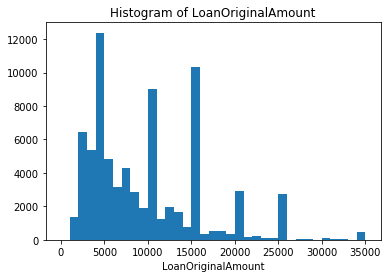

In [14]:
bins=np.arange(0,clean_loan['LoanOriginalAmount'].max()+1000,1000)
plt.hist(data=clean_loan, x='LoanOriginalAmount',bins=bins);
plt.title('Histogram of LoanOriginalAmount')
plt.xlabel('LoanOriginalAmount');

As we can see this histogram is righ skewed and it have three high peaks at 5000, 10000 and 15000, and two medium peaks at 20000 and 25000. But we can try a log scale for better observation.

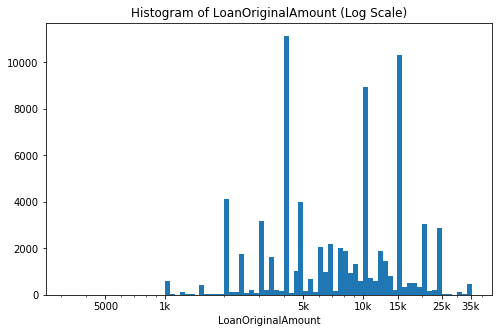

In [15]:
bins=10**(np.arange(2.5,np.log10(clean_loan['LoanOriginalAmount'].max())+0.025,0.025))
plt.figure(figsize=[8, 5])
plt.xscale('log')
plt.hist(data=clean_loan, x='LoanOriginalAmount',bins=bins);
plt.title('Histogram of LoanOriginalAmount (Log Scale)')
#plt.xticks([0,1e3,2e3,5e3,1e4,1.5e4,2e4,2.5e4,3e4,3.5e4],)
plt.xticks([500,1000,5000,10000,15000,25000,35000], [5000,'1k','5k','10k','15k','25k','35k'])
plt.xlabel('LoanOriginalAmount');

Now we can see the same peaks but also some at 1k, 2k,3k 3.5k, 6k, 7k and 8k. These and the other peaks can be explained since those are the most standard amounts for loan. 

Another variable that we consider as the most important in our data frame is the Borrower APR . Lets look then at its distribution and also take a look at the distribution of BorrowerRate.

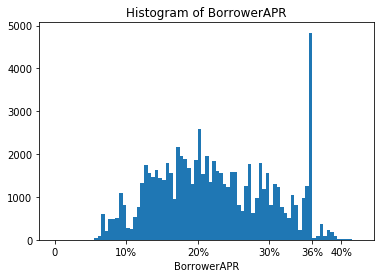

In [16]:
bins=np.arange(0,clean_loan['BorrowerAPR'].max()+0.005,0.005)
plt.hist(data=clean_loan, x='BorrowerAPR',bins=bins);
plt.title('Histogram of BorrowerAPR')
plt.xticks([0,0.1,0.2,0.3,0.36,0.4],[0,'10%','20%','30%','36%','40%'])
plt.xlabel('BorrowerAPR');

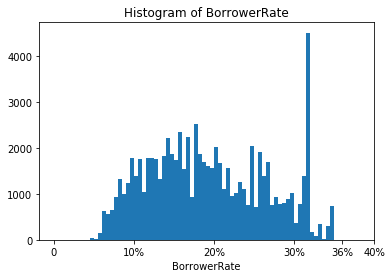

In [17]:
bins=np.arange(0,clean_loan['BorrowerRate'].max()+0.005,0.005)
plt.hist(data=clean_loan, x='BorrowerRate',bins=bins);
plt.title('Histogram of BorrowerRate')
plt.xticks([0,0.1,0.2,0.3,0.36,0.4],[0,'10%','20%','30%','36%','40%'])
plt.xlabel('BorrowerRate');

As we can see the distribution of BorrowerAPR looks pretty normal with the exception of a big peak next to the 36% of APR. We can think that maybe this peak is due to the confiability of Prosper on some kind of borrowers borrowers. We are going to do more explorations about this. Also we can see that the distribution of BorrowerRate its very similar but it gets the big peak before, this could be expected since the APR is always bigger than the interest rate.

First we are going to look at the proportion of borrowers with APR between 0.35 and 0.36 that are not on a group.

In [18]:
# proportion of borrowers with APR between 0.35 and 0.36 that are not on a group
prop_nogroup=(clean_loan.query('(0.36>BorrowerAPR>0.35) and (CurrentlyInGroup==False)')['CurrentlyInGroup'].count())/(clean_loan.query('0.36>BorrowerAPR>0.35')['CurrentlyInGroup'].count())
prop_nogroup

0.9857166310950582

As we can see the 98% of the borrowers  with APR between 0.35 and 0.36  are not on a group.
Now we want to look at the borrowers  that are on a group and variables like 'EmploymentStatus' and 'IncomeRange'. 

In [19]:
# Convert ProsperRating and IncomeRange into ordered categorical types
rate_order = ['HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rate_order)
clean_loan['ProsperRating (Alpha)'] = clean_loan['ProsperRating (Alpha)'].astype(ordered_var)


inc_order = ['Not Employed','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = inc_order)
clean_loan['IncomeRange'] = clean_loan['IncomeRange'].astype(ordered_var)

In [20]:
group=clean_loan.query('(CurrentlyInGroup==True)')[['EmploymentStatus','IncomeRange']]

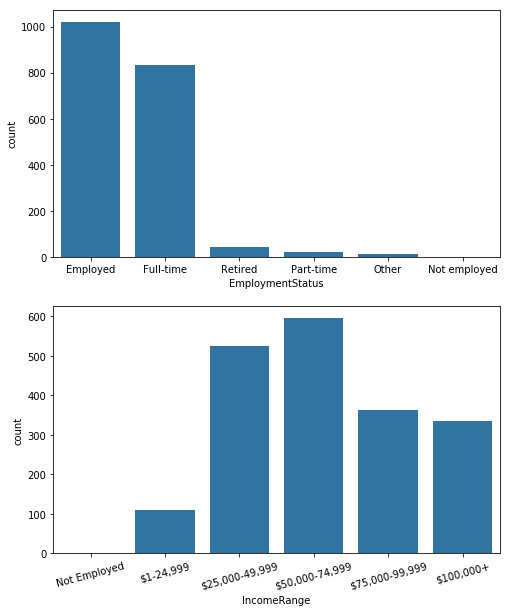

In [21]:
# countplot of variables 'EmploymentStatus','IncomeRange' and 'CurrentDelinquencies'
fig, ax = plt.subplots(nrows=2, figsize = [8,10])

color=sns.color_palette()[0]
sns.countplot(data=group,x='EmploymentStatus',color=color,ax=ax[0]);
sns.countplot(data=group,x='IncomeRange',color=color,ax=ax[1]);
plt.xticks(rotation=15);

As we can see from the above graphics, borrowers on a group are mostly employed and full-time employed and have salary ranges between 25k and 75k.

One of the important questions that we have is what factors affect a loan’s outcome status? Since this is a categorical variable we will use a bar chart to explore what are the most common status of loans.

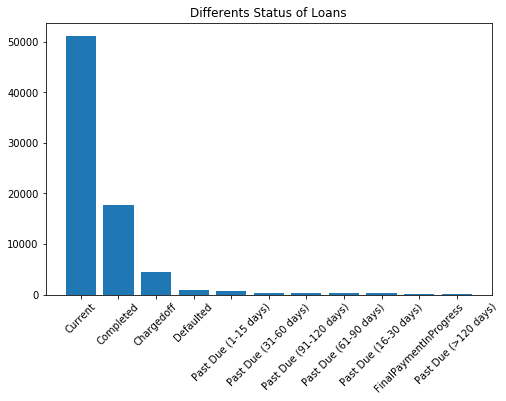

In [22]:
loan_stat=clean_loan['LoanStatus'].value_counts()
plt.figure(figsize=(8,5))
plt.bar(loan_stat.index,loan_stat);
plt.xticks(rotation=45);
plt.title('Differents Status of Loans');

As it is expected the most common status of a loan is Current followed by Completed, but the majority of status have a low quantity of loans reported.  In fact status like Past Due (>120 days) only have 14 loans. We are going to keep these samples for now.

In [23]:
loan_stat

Current                   51170
Completed                 17687
Chargedoff                 4444
Defaulted                   885
Past Due (1-15 days)        714
Past Due (31-60 days)       322
Past Due (91-120 days)      277
Past Due (61-90 days)       275
Past Due (16-30 days)       241
FinalPaymentInProgress      187
Past Due (>120 days)         14
Name: LoanStatus, dtype: int64

### __Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?__

BorrowerAPR and BorrowerRate seems to have a bimodal distribution with a high peak at 0.35 and 0.32 respectively. LoanOriginalAmount seems to have a multimodal distribution with a big nuber of peaks in the common loan amounts. In this case the distribution was righ skewed and we perform a log transformation.

### __Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?__

In the case of BorrowerAPR and BorrowerRate we found a big peak at 0.35 and 0.32 respectively, we think that this is unusual because the distributions without there peak look pretty normal. We think at the beginning in removing these samples but then we found a relation between these samples and the fact tha the borrower is not on a group.

#### Bivariate Analysis

Now we want to explore the relations between the variables that we inspected before. 

* Is there a relation between the Income range and the borrowers APR?
* Is there a relation between the fact that a borrower is or not on a group and the borrowers APR?
* Is there a relation between the loan initial amount and the loan outcome status?

First we are going to look for the relation between the income range and the borrowers APR.

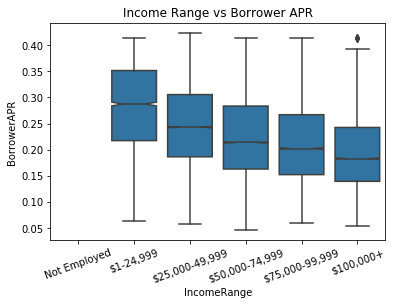

In [24]:
color=sns.color_palette()[0]
sns.boxplot(data=clean_loan,x='IncomeRange',y='BorrowerAPR',color=color,notch=True);
plt.xticks(rotation=20);
plt.title('Income Range vs Borrower APR');

As we can expect people with low income of 1 dollar to 25k have the higher APR and people with income of 100k or more have a low APR.  To have a better idea of this relation it will be good in this case a violinplot. 

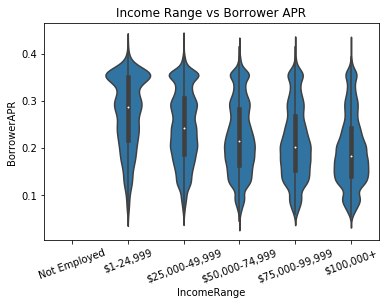

In [25]:
color=sns.color_palette()[0]
sns.violinplot(data=clean_loan,x='IncomeRange',y='BorrowerAPR',color=color);
plt.xticks(rotation=20);
plt.title('Income Range vs Borrower APR');

As we can see from the violinplot the majority of borrowers with income 100k+ have low APR and the majority of borrowers with income 1-25k $ have high APR, which could be expected.

Now we want to find if there is a relation between the fact that a borrower is or not on a group and the borrowers APR.

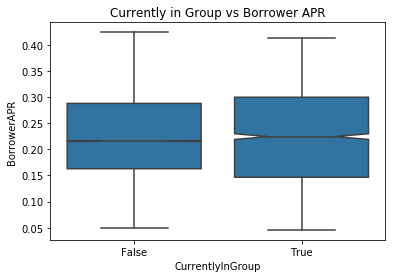

In [26]:
color=sns.color_palette()[0]
sns.boxplot(data=clean_loan,x='CurrentlyInGroup',y='BorrowerAPR',color=color,notch=True);
plt.title('Currently in Group vs Borrower APR');

From this boxplot we can't observe a significant difference between the median of those two group, in order to have a better perspective we are going to make a violinplot

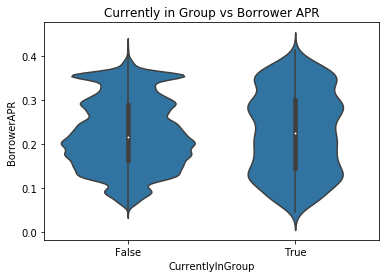

In [27]:
color=sns.color_palette()[0]
sns.violinplot(data=clean_loan,x='CurrentlyInGroup',y='BorrowerAPR',color=color,notch=True);
plt.title('Currently in Group vs Borrower APR');

These plots look very similar with the exception that  in the case of people that are not in a group the curve is wider than people that are in a group with APR approximatelly 0.35.

Now we will look if there is a relation between the loan initial amount and the loan outcome status.

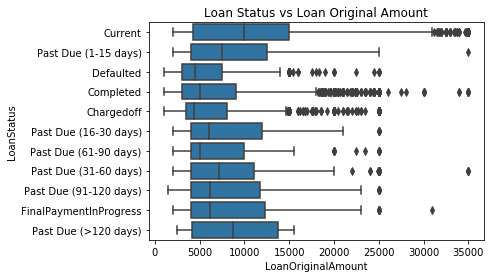

In [28]:
color=sns.color_palette()[0]
sns.boxplot(data=clean_loan,y='LoanStatus',x='LoanOriginalAmount',color=color);
plt.title('Loan Status vs Loan Original Amount');

It seems to be that borrower who have completed their loans have in median loans with low original amount and people with with a current status of loan or a past due status of more than 120 days have in median loans with the highest original amount. 

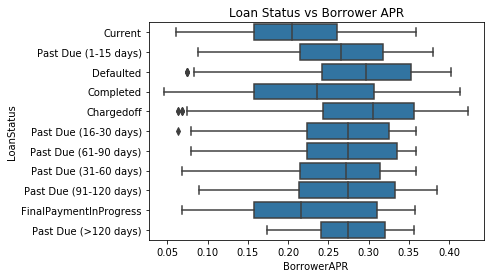

In [29]:
color=sns.color_palette()[0]
sns.boxplot(data=clean_loan,y='LoanStatus',x='BorrowerAPR',color=color);
plt.title('Loan Status vs Borrower APR');

As it could be expected people who defaulted  and with charge had more APR in their loans and people who complete and that are about to had low APR.

We have have digged into our principal questions, but to have a more general impresion of our data we are going to look at the correlation matrix.

In [30]:
vnumeric=clean_loan.select_dtypes(include=[np.number])
num_cols=vnumeric.columns

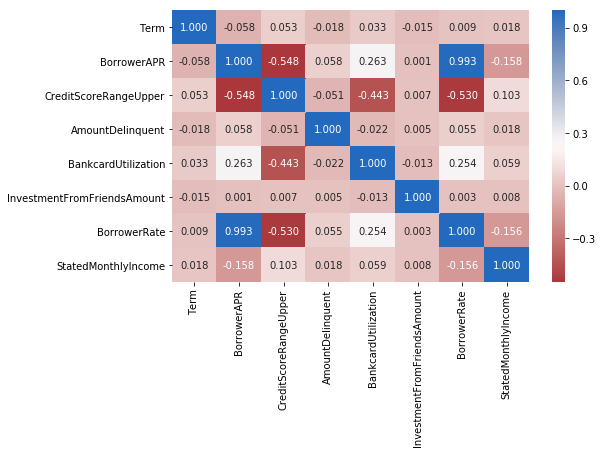

In [31]:
plt.figure(figsize = [8, 5])
num=['Term','BorrowerAPR','CreditScoreRangeUpper','AmountDelinquent',
     'BankcardUtilization','InvestmentFromFriendsAmount','BorrowerRate','StatedMonthlyIncome']
sns.heatmap(clean_loan[num].corr(),annot=True,fmt='.3f',cmap = 'vlag_r');

It seems that there is a low positive correlation between the BorrowerAPR and the BankCardUtilization and a moderate negative correlation CreditSoreRangeUpper and the BorrowerAPR and between the CreditSoreRangeUpper and the BankCardUtilization. Also there is a strong correlation between BorrowerAPR and BorrowerRate.

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


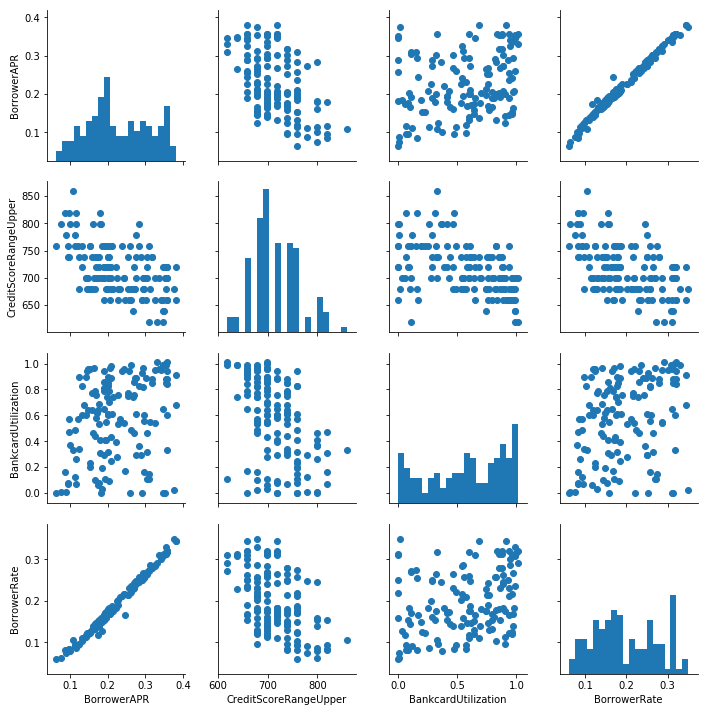

In [32]:
num=['BorrowerAPR','CreditScoreRangeUpper','BankcardUtilization','BorrowerRate']
samples = np.random.choice(clean_loan.shape[0], 200, replace = False)
loan_samp = clean_loan.loc[samples,:]

g = sns.PairGrid(data = loan_samp, vars = num)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

We  found an strong relation between our numerical variables of interest BorrowerAPR and BorrowerRate as it is expected. Now let's look at the categorical variables.

In [33]:
vcat=clean_loan.select_dtypes(exclude=[np.number])
cat_cols=vcat.columns
cat_cols

Index(['ListingKey', 'ListingCreationDate', 'LoanStatus',
       'ProsperRating (Alpha)', 'BorrowerState', 'Occupation',
       'EmploymentStatus', 'IsBorrowerHomeowner', 'CurrentlyInGroup',
       'DateCreditPulled', 'FirstRecordedCreditLine', 'IncomeRange',
       'IncomeVerifiable', 'LoanKey', 'LoanOriginationDate',
       'LoanOriginationQuarter', 'MemberKey'],
      dtype='object')

In [34]:
cat=['ProsperRating (Alpha)','CurrentlyInGroup', 'IsBorrowerHomeowner', 'IncomeRange']

In [84]:
# function for plotting a boxgrid
def boxgrid(r,c,var,y,data,title):
    fig, ax = plt.subplots(nrows=r, ncols=c,figsize = [15,8])
    fig.suptitle(title);
    nrows=r
    ncols=c
    for i in range(len(var)):
        color=sns.color_palette()[0]
        sns.boxplot(data=data,x=var[i],y=y,color=color,ax=ax[i//c][i%c],notch=True);
        plt.xticks(rotation=15);


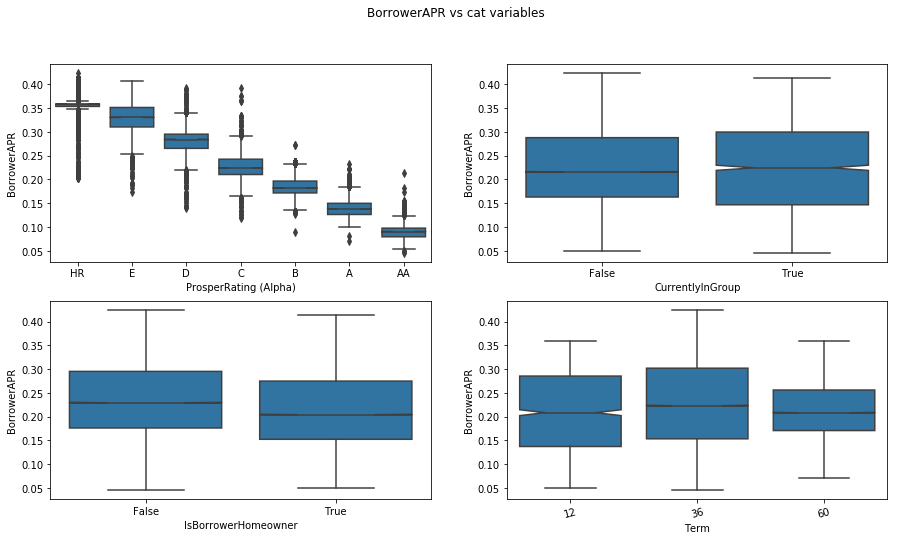

In [85]:
boxgrid(2,2,cat,'BorrowerAPR',clean_loan,'BorrowerAPR vs cat variables')

As we can see the variable ProsperRating shows a relation with the Borrower APR, in this case the category AA have the low borrower APR and the categories HR and E have the highest APR. Also we can see difference in the median of APR between Home Owners and Not home owners but this difference is not significant.

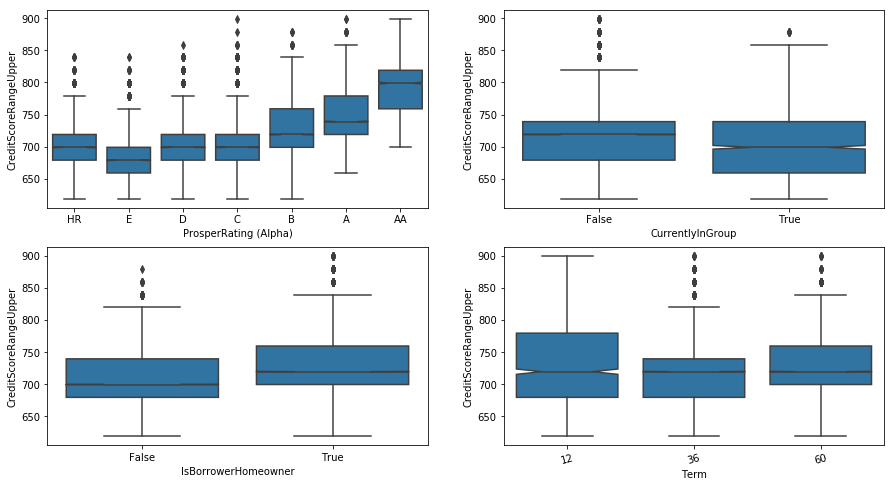

In [86]:
boxgrid(2,2,cat,'CreditScoreRangeUpper',clean_loan,'')

We also see that the variable ProsperRating have influence in the Credit Score Range as is expected with the category E with low Credit Score and the category AA with high  Credit Score. We also found that the borrowers that are not on a group have a median of credit score bigger than the ones who are on a group and Home owners have a median of credit score bigger than the ones who are not.

### __Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?__

We found a relation between the BorrowerAPR and ProsperRating(Alpha), IsBorrowerHomeowner, IncomeRange and in the case 'CurrentlyInGroup' plots look very similar with the exception that in the case of people that are not in a group the curve is wider than people that are in a group with APR approximatelly 0.35.

* In the case of the variable ProsperRating the category AA have the low borrower APR and the categories HR and E have the highest APR.
* Borrowers with income 100k+ have low APR and the majority of borrowers with income 1-25k $ have high APR.
* We can see differences in the median of APR between Home Owners and Not home owners but this difference is doesn't seem to be significant.

We also found an strong linear correlation between the BorrowerAPR and BorrowerRate.

In the case of LoanStatus we found a relation with BorrowerAPR and LoanOriginalAmount.

* People who defaulted  and with charge had more APR in their loans and people who complete and that are about to had low APR.
* Borrowers who have completed their loans have in median loans with low original amount and people with with a current status of loan or a past due status of more than 120 days have in median loans with the highest original amount.

### __Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?__

We found interesting relations between CreditScoreRangeUpper and ProsperRating, CurrentlyInGroup and IsBorrowerHomwowner:

* The variable ProsperRating have influence in the Credit Score Range as is expected with the category E with low Credit Score and the category AA with high  Credit Score.
* The borrowers that are not on a group have a median of credit score bigger than the ones who are on a group
* Home owners have a median of credit score bigger than the ones who are not.


#### Multivariate Analysis

In this section our principal aim is to find relations between the  Borrowers APR and some other variables of interest.

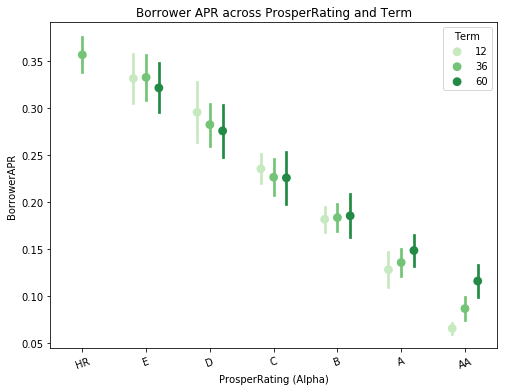

In [69]:
fig = plt.figure(figsize = [8,6])
ax = sns.pointplot(data = clean_loan, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue =  'Term',
           palette = 'Greens', linestyles = '', dodge = 0.4, ci='sd')
ax.set_title('Borrower APR across ProsperRating and Term')
plt.xticks(rotation=20)
plt.show();

As we can see from this plot for Prosper Ratings of E,D and C the Borrower APR decrease with the increase of the term and for Prosper Ratings of B,A and AA the Borrower APR increase with the decrease of the term.

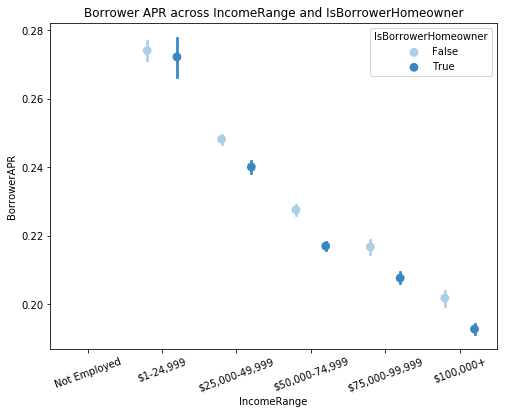

In [42]:
fig = plt.figure(figsize = [8,6])
ax = sns.pointplot(data = clean_loan, x = 'IncomeRange', y = 'BorrowerAPR', hue =  'IsBorrowerHomeowner',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Borrower APR across IncomeRange and IsBorrowerHomeowner')
plt.xticks(rotation=20)
plt.show();

Also the Borrower APR decrease with the increase of the income range with independence if the Borrower is home owner or not, and the borrower APR is low for home owners with income bigger than 25k.

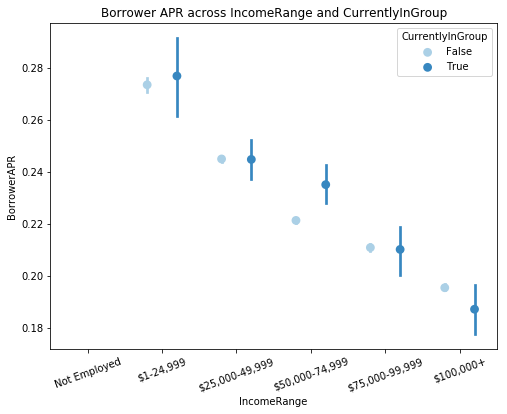

In [50]:
fig = plt.figure(figsize = [8,6])
ax = sns.pointplot(data = clean_loan, x = 'IncomeRange', y = 'BorrowerAPR', hue =  'CurrentlyInGroup',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Borrower APR across IncomeRange and CurrentlyInGroup')
plt.xticks(rotation=20)
plt.show();

The Borrower APR is bigger for people that are on a group and have income range between 50k and 75k, and is low for people that are on a group and have income 100k+.

### __Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?__

We want to find relations between the BorrowerAPR and categorical variables of interst like IncomeRange, CurrentlyInGroup, IsBorrowerHomeowner, 'ProsperRating (Alpha)' and Term. We found interesting relations between BorrowerAPR, ProsperRating and Term. The Prosper Ratings of E,D and C the Borrower APR decrease with the increase of the term and for Prosper Ratings of B,A and AA the Borrower APR increase with the decrease of the term. We also found interesting relations in Borrower APR across IncomeRange and IsBorrowerHomeowner.

### __Were there any interesting or surprising interactions between features?__

In our case was really surprising that Borrower APR is bigger for people that are on a group and have income range between 50k and 75k, and is low for people that are on a group and have income 100k+. We would expect an strongest relation between the IncomeRange and the fact that a person is on a group.

<a id='explanatoryda'></a>

## Explanatory Data Analysis

In this section we are going to present our results but we want to focus on the factors that affect the Borrower APR.

#### Distribution of Borrower APR

The distribution of BorrowerAPR looks bimodal with one big peak next to the 36% of APR. We found that the 98% of samples in this peak are not on a group.

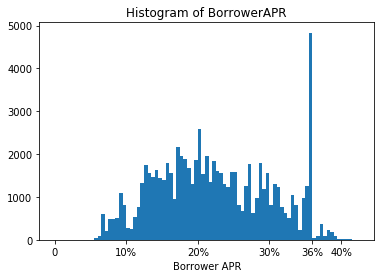

In [52]:
bins=np.arange(0,clean_loan['BorrowerAPR'].max()+0.005,0.005)
plt.hist(data=clean_loan, x='BorrowerAPR',bins=bins);
plt.title('Histogram of BorrowerAPR')
plt.xticks([0,0.1,0.2,0.3,0.36,0.4],[0,'10%','20%','30%','36%','40%'])
plt.xlabel('Borrower APR');

#### IncomeRange vs BorrowerAPR

The Borrower APR meadian decrease as the Income Range increase. Categories corresponding to incomes below 50k have most of this samples with High APR and categories with incomes above 50k most of this samples with low APR.

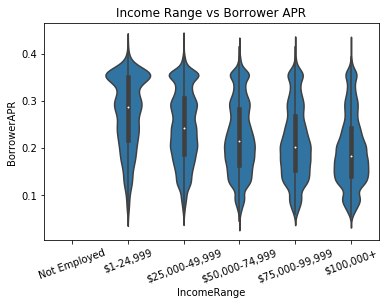

In [53]:
color=sns.color_palette()[0]
sns.violinplot(data=clean_loan,x='IncomeRange',y='BorrowerAPR',color=color);
plt.xticks(rotation=20);
plt.title('Income Range vs Borrower APR');

####  BorrowerAPR vs ProsperRating, CurrentlyInGroup, IsBorrowerHomeowner and Term

There is a strong relation between Prosper Rating and Borrower APR, borrowers with category HR has the high APR and borrowers with category AA have the lowest APR. We haven't found significant relations between Currently in Group and Term vs Borrower APR. Borrowers who are home owners have low APR.

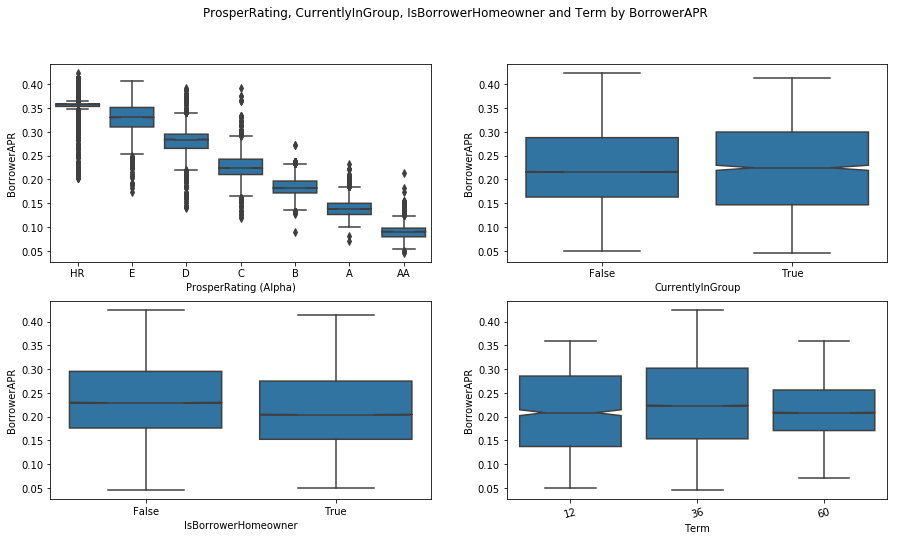

In [87]:
cat=['ProsperRating (Alpha)','CurrentlyInGroup', 'IsBorrowerHomeowner', 'Term']
fig=boxgrid(2,2,cat,'BorrowerAPR',clean_loan,'ProsperRating, CurrentlyInGroup, IsBorrowerHomeowner and Term by BorrowerAPR');


#### Borrower APR across ProsperRating and Term

For Prosper Ratings of E,D and C the Borrower APR decrease with the increase of the term and for Prosper Ratings of B,A and AA the Borrower APR increase with the decrease of the term. 

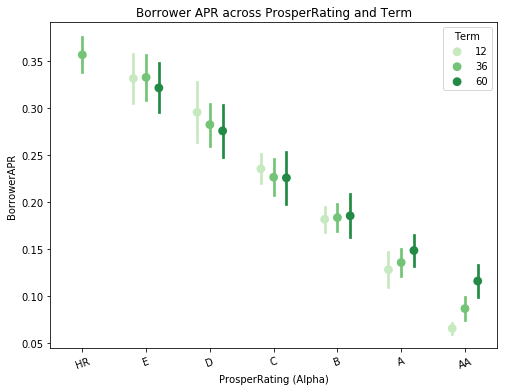

In [88]:
fig = plt.figure(figsize = [8,6])
ax = sns.pointplot(data = clean_loan, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue =  'Term',
           palette = 'Greens', linestyles = '', dodge = 0.4, ci='sd')
ax.set_title('Borrower APR across ProsperRating and Term')
plt.xticks(rotation=20)
plt.show();

#### Borrower APR across IncomeRange and IsBorrowerHomeowner

The Borrower APR decrease with the increase of the income range with independence if the Borrower is home owner or not, and the borrower APR is low for home owners with income bigger than 25k.

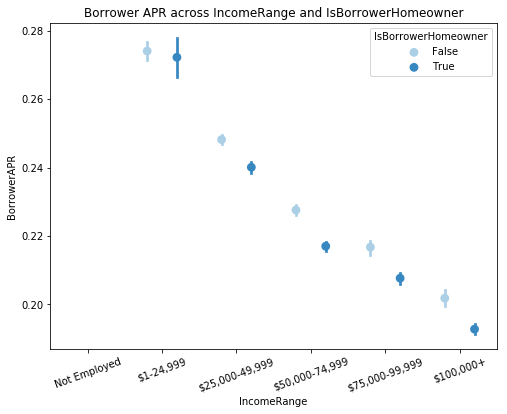

In [89]:
fig = plt.figure(figsize = [8,6])
ax = sns.pointplot(data = clean_loan, x = 'IncomeRange', y = 'BorrowerAPR', hue =  'IsBorrowerHomeowner',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Borrower APR across IncomeRange and IsBorrowerHomeowner')
plt.xticks(rotation=20)
plt.show();

### Key insights for Presentation

For the presentation we focus on the principal factors that we found that affect the Borrowers APR. We start by plotting the distribution of our principal variable and the we were including the categorical variables to perform a bivariate analysis with the Borrowers APR. 

To start we used a violinplot of the Income Range vs the Borrowers APR and the we include a boxgrid with variables ProsperRating, CurrentlyInGroup, IsBorrowerHomeowner and Term by BorrowerAPR. Then since we don't foind the bivariates relations that we expect in some cases we perform a multivariate pointplot first taking Borrower APR across ProsperRating and Term and then Borrower APR across IncomeRange and IsBorrowerHomeowner.

<a id='summary'></a>

## Summary

We found a relation between the BorrowerAPR and ProsperRating(Alpha), IsBorrowerHomeowner, IncomeRange and in the case 'CurrentlyInGroup' plots look very similar with the exception that in the case of people that are not in a group the curve is wider than people that are in a group with APR approximatelly 0.35.

* In the case of the variable ProsperRating the category AA have the low borrower APR and the categories HR and E have the highest APR.
* Borrowers with income 100k+ have low APR and the majority of borrowers with income 1-25k $ have high APR.
* We can see differences in the median of APR between Home Owners and Not home owners but this difference is doesn't seem to be significant.

We also found an strong linear correlation between the BorrowerAPR and BorrowerRate.

In the case of LoanStatus we found a relation with BorrowerAPR and LoanOriginalAmount.

* People who defaulted  and with charge had more APR in their loans and people who complete and that are about to had low APR.
* Borrowers who have completed their loans have in median loans with low original amount and people with with a current status of loan or a past due status of more than 120 days have in median loans with the highest original amount.

We found interesting relations between CreditScoreRangeUpper and ProsperRating, CurrentlyInGroup and IsBorrowerHomwowner:

* The variable ProsperRating have influence in the Credit Score Range as is expected with the category E with low Credit Score and the category AA with high  Credit Score.
* The borrowers that are not on a group have a median of credit score bigger than the ones who are on a group
* Home owners have a median of credit score bigger than the ones who are not.

* For Prosper Ratings of E,D and C the Borrower APR decrease with the increase of the term and for Prosper Ratings of B,A and AA the Borrower APR increase with the decrease of the term. 

* The Borrower APR decrease with the increase of the income range with independence if the Borrower is home owner or not, and the borrower APR is low for home owners with income bigger than 25k.

* The Borrower APR is bigger for people that are on a group and have income range between 50k and 75k, and is low for people that are on a group and have income 100k+.